# **Exploração e análise de dados de crédito com SQL**
.

# **Os dados representam informações de clientes de um banco e contam com as **

seguintes colunas:

•	idade = idade do cliente

•	sexo = sexo do cliente (F ou M)

•	dependentes = número de dependentes do cliente

•	escolaridade = nível de escolaridade do clientes

•	salario_anual = faixa salarial do cliente

•	tipo_cartao = tipo de cartao do cliente

•	qtd_produtos = quantidade de produtos comprados nos últimos 12 meses

•	iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses

•	meses_inativo_12m = quantidade de meses que o cliente ficou inativo

•	limite_credito = limite de credito do cliente

•	valor_transacoes_12m = valor das transações dos ultimos 12 meses

•	qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em:
 https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset


# **Exploração de dados:**
A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos a exploração de dados:
Qual a quantidade de informações temos na nossa base de dados?
select count(*) from credito!

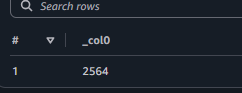

Quais os tipos de cada dado

Query: DESCRIBE credito

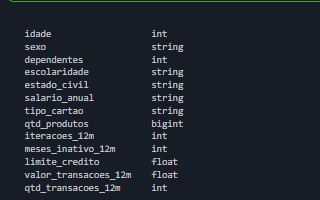

**Como são os dados**

query SELECT * FROM "default"."credito" limit 10;
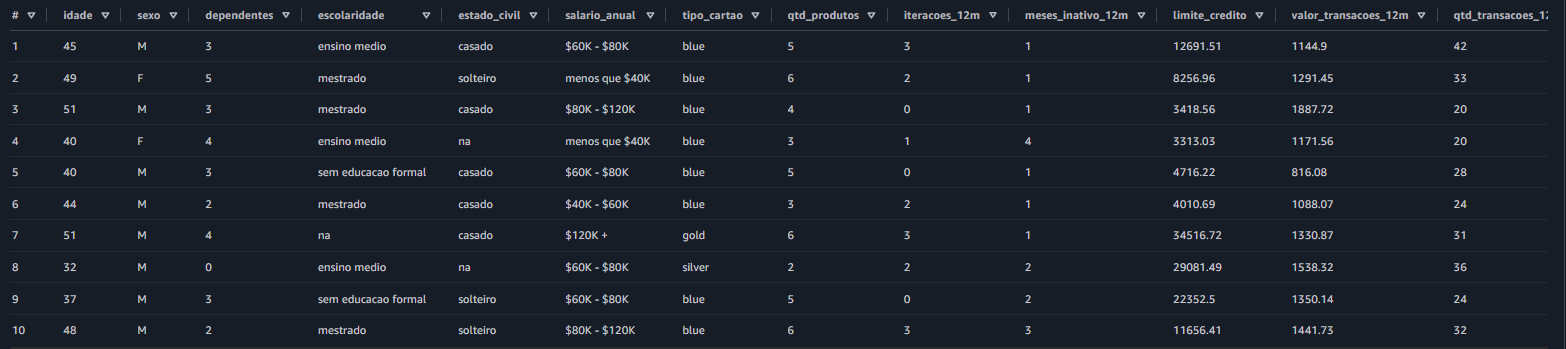

É possível reparar que existem algumas informações nulas na tabela (valor na), vamos olhar mais de perto para os valores de cada coluna!
Quais os tipos de cada dado
Query: DESCRIBE credito


Agora que ja entendemos quais são os tipos de dados, vamos olhar mais atentamente para as varíaveis que não são numéricas.

**Quais são os tipos de escolaridade disponíveis no dataset?**

Query: SELECT DISTINCT escolaridade FROM credito

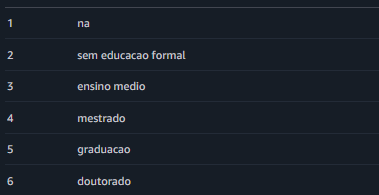

**Aqui vemos que não há necessidade de tratar valores nulos.**

**Análise de dados**

Uma vez que exploramos o dados e buscamos entender quais são as informações que temos no nosso banco de dados, podemos analisar as informações para buscar entender o que está acontecendo no banco de dados. Vamos fazer perguntas: / Nesse banco de dados, quantos clientes temos de cada faixa salarial?


Query: select count(*), salario_anual from credito group by salario_anual

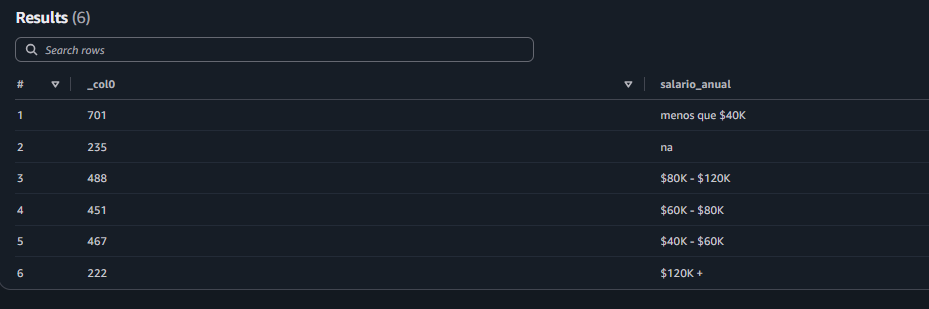

a maioria dos clientes dessa base de dados possui um renda menor que 40K e existem 235 clientes que não informaram ou não consta a faixa salarial. De certa forma, pode ser interessante para a empresa focar nesse público de mais baixa renda.



**Nesse banco de dados, quantos clientes são homens e quantos são mulheres?**

Query: select count(*), sexo from credito group by sexo

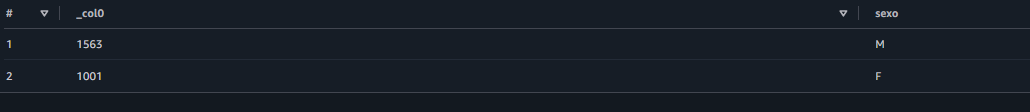


**Quais as características dos clientes que possuem os maiores creditos?**

Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

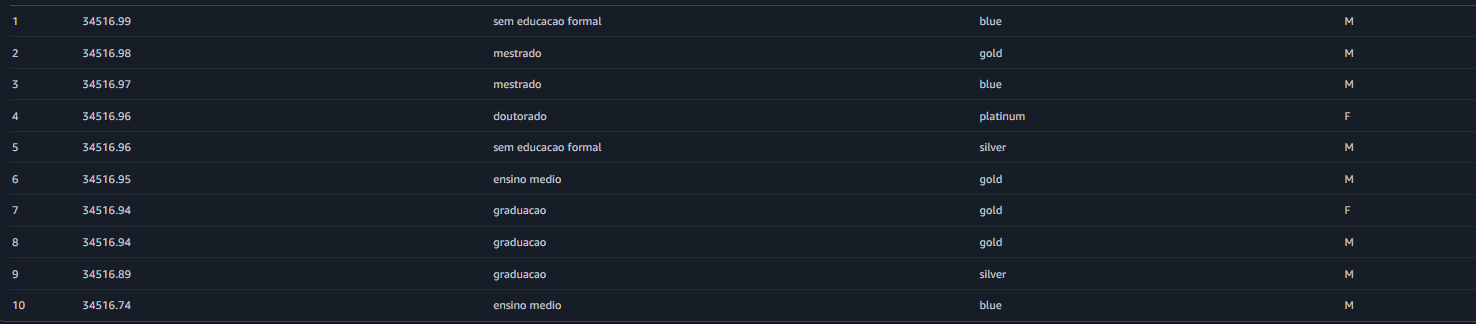


Não parece haver um impacto da escolaridade no limite. O limite mais alto é oferecido para um homem sem educação formal. O cartão também parece não estar relacionado com a escolaridade nem com o limite. Dentre os maiores limites, encontramos clientes com cartão: gold, silver, platinum e blue


**Será que as mulheres gastam mais?**

Query: select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito group by sexo

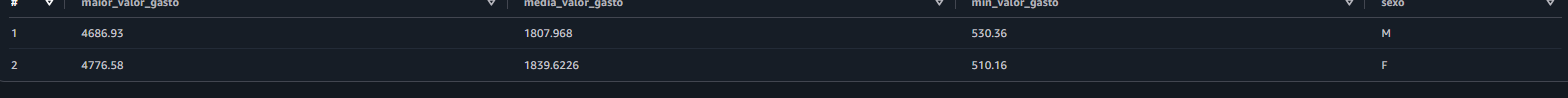


Apesar da diferença nos limites, os gastos de homens e mulheres são similares!
Por fim,



**O salário impacta no limite?**

Query: select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc

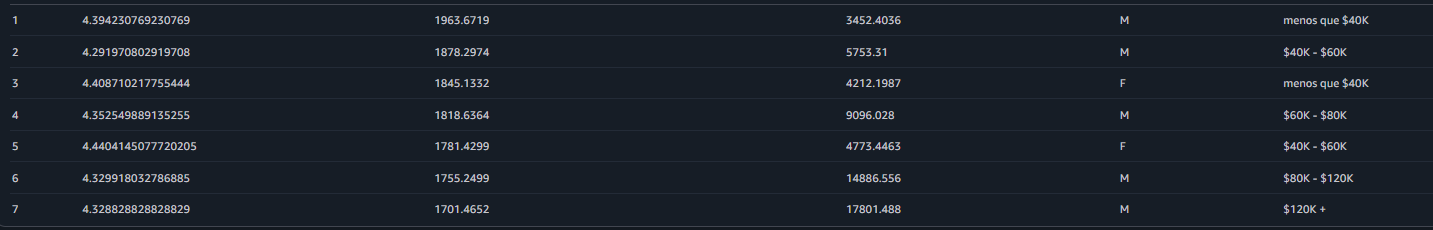

SIM! As pessoas que tem menor faixa salarial também apresentam menor limite de credito!

# **Conclusão**
Essas foram algumas análises extraídas do dataset de crédito.
Alguns insights interessantes:
•	a maior parte dos clientes possui renda até 40K
•	a maior parte dos clientes é masculino!
•	a escolaridade não parece influenciar no limite nem no tipo do cartão
•	os clientes com maiores limites são em sua maioria homens
•	os clientes com menores limites são em sua maioria mulheres
•	dentre os menores limites não há presença de cartão platinum
•	a faixa salarial impacta diretamente no limite de crédito
•	nao existem clientes com salário anual acima de 60K do sexo feminino
Uma exploração maior dos dados pode explicar porque as mulheres tem menor crédito. Isso também pode ser um problema cultural que pode ser repensado!
